In [59]:
import os, sys
import h5py
import numpy as np
import pandas as pd
from scipy.interpolate import InterpolatedUnivariateSpline
from scipy import optimize
import matplotlib.pyplot as plt
from scipy import integrate
from scipy.optimize import curve_fit
from scipy.stats import norm
import matplotlib.font_manager as font_manager
from tqdm.autonotebook import tqdm
from matplotlib.backends.backend_pdf import PdfPages
import time
from scipy.optimize import curve_fit
from scipy.stats import norm
from scipy import stats
import scipy.stats
import pickle

import etroc1_array

In [60]:
##############  20 fC  ##########################
# path = './data/Baseline_Scan_6fC/Scan_Baseline_Pixel=0_QInj_1M25_QSel=6fC/'  # Pixle=0
# path = './data/Baseline_Scan_6fC/Scan_Baseline_Pixel=1_QInj_1M25_QSel=6fC/'  # Pixle=1
# path = './data/Baseline_Scan_6fC/Scan_Baseline_Pixel=2_QInj_1M25_QSel=6fC/'  # Pixle=2
# path = './data/Baseline_Scan_6fC/Scan_Baseline_Pixel=3_QInj_1M25_QSel=6fC/'  # Pixle=3
# path = './data/Baseline_Scan_6fC/Scan_Baseline_Pixel=4_QInj_1M25_QSel=6fC/'  # Pixle=4
# path = './data/Baseline_Scan_6fC/Scan_Baseline_Pixel=5_QInj_1M25_QSel=6fC/'  # Pixle=5
# path = './data/Baseline_Scan_6fC/Scan_Baseline_Pixel=6_QInj_1M25_QSel=6fC/'  # Pixle=6
# path = './data/Baseline_Scan_6fC/Scan_Baseline_Pixel=7_QInj_1M25_QSel=6fC/'  # Pixle=7
# path = './data/Baseline_Scan_6fC/Scan_Baseline_Pixel=8_QInj_1M25_QSel=6fC/'  # Pixle=8
# path = './data/Baseline_Scan_6fC/Scan_Baseline_Pixel=9_QInj_1M25_QSel=6fC/'  # Pixle=9
# path = './data/Baseline_Scan_6fC/Scan_Baseline_Pixel=10_QInj_1M25_QSel=6fC/'  # Pixle=10
# path = './data/Baseline_Scan_6fC/Scan_Baseline_Pixel=11_QInj_1M25_QSel=6fC/'  # Pixle=11
# path = './data/Baseline_Scan_6fC/Scan_Baseline_Pixel=12_QInj_1M25_QSel=6fC/'  # Pixle=12
# path = './data/Baseline_Scan_6fC/Scan_Baseline_Pixel=13_QInj_1M25_QSel=6fC/'  # Pixle=13
# path = './data/Baseline_Scan_6fC/Scan_Baseline_Pixel=14_QInj_1M25_QSel=6fC/'  # Pixle=14
# path = './data/20200901_thresholdscan/DAC_Scan_QSel=20fC_QInj=1M25_HV=-200V_Measure_jitter_SB2'  # Pixle=15 0901
# path = './data/20200902_thresholdscan/DAC_Scan_QSel=20fC_QInj=1M25_HV=-200V_Measure_jitter_revclk=1_SB2'  # Pixle=15 0902
# path = './data/20200902_thresholdscan_1/DAC_Scan_QSel=20fC_QInj=1M25_HV=-200V_revclk=1_PhaseAdj=0_SB2'  # Pixle=15 0902_1
# path = './data/20200902_thresholdscan_1/P10_DAC_Scan_QSel=20fC_QInj=1M25_HV=-200V_PhaseAdj=40_SB2'  # Pixle=10 0902_1
# path = './data/20200902_thresholdscan_1/P5_DAC_Scan_QSel=20fC_QInj=1M25_HV=-200V_PhaseAdj=40_SB2'  # Pixle=5 0902_1
path = './data/20200902_thresholdscan_1/P0_DAC_Scan_QSel=20fC_QInj=1M25_HV=-200V_PhaseAdj=40_SB2'  # Pixle=5 0902_1

file_in = 'Array_T_Pixel=15_DAC_P15=441_QSel=20_CLSel=0_RfSel=2_IBSel=7_PhaseAdj=140_B2_200000_09-02_11-14-22.dat'

pixe_index='Pix0'





datapath = os.listdir(path)
# print(datapath)
file_in = [item for item in datapath if item.split('.')[1]=='dat']

# f_r = open('\\\\?\\'+os.path.abspath(path) +'\\'+ file_in[0], 'r')
# lines = f_r.readlines()
# f_r.close()

# print(lines[0:20])

# print(file_in)
num_file = len(file_in)

# qinj_base = 16    ##  2.5 MHz Qinj frequency
# qinj_base = 2       ##  20 MHz
# qinj_base = 100       ##  400 kHz
qinj_base = 32       ##  1.25 MHz

# toa=np.array([0]*num_file)
# print('toa is',toa)

# print(file_in)



toa_list = []
toa_mu_list = []
toa_std_list = []
tot_list = []
tot_mu_list = []
tot_std_list = []
cal_list = []
cal_mu_list = []
cal_std_list = []
hitposition_list = []
hitposition_mod_list = []
phase_list=[]
events_list = []
DAC_list = []
hits_list = []
i=0
for item in tqdm(file_in):
#     f_r = open('\\\\?\\'+os.path.abspath(path) + file_in[i], 'r')
    f_r = open('\\\\?\\'+os.path.abspath(path) +'\\'+ file_in[i], 'r')
    lines = f_r.readlines()
    f_r.close()
    
    num_lines = len(lines)
    
#     print('number of lines is', num_lines)
    
    word_to_plot = num_lines
    
#     print(lines[0])
#     print('hitflag is',lines[0].split()[3])
    
#     print(lines[0])
#     print('toa is',int(lines[0].split()[0]))
    
#     print('split is',lines[0].split())
    
    
    toa = []
    tot = []
    cal = []
    hitposition = []
    hitposition_mod = []
    events = 0
    for m in range (0, num_lines):
        line_item = lines[m]
        if line_item.split()[3] == '1':
            toa += [int(line_item.split()[0])]
            tot += [int(line_item.split()[1])]
            cal += [int(line_item.split()[2])]
            hitposition += [m]
            hitposition_mod += [m%qinj_base]
            events = events + 1
    
    
    toa_mu = np.mean(toa)
    toa_std = np.std(toa)
    tot_mu = np.mean(tot)
    tot_std = np.std(tot)
    cal_mu = np.mean(cal)
    cal_std = np.std(cal)
    
    PhaseAdj = int(file_in[i].split("=")[7].split('_')[0])
    DAC_setting = int(file_in[i].split("=")[2].split('_')[0])
    
    hit_number = len(toa)
    
    toa_list.append(toa)
    toa_mu_list.append(toa_mu)
    toa_std_list.append(toa_std)
    tot_list.append(tot)
    tot_mu_list.append(tot_mu)
    tot_std_list.append(tot_std)
    cal_list.append(cal)
    cal_mu_list.append(cal_mu)
    cal_std_list.append(cal_std)
    hitposition_list.append(hitposition)
    hitposition_mod_list.append(hitposition_mod)
    phase_list.append(PhaseAdj)
    events_list.append(events)
    DAC_list.append(DAC_setting)
    hits_list.append(hit_number)
    
    i += 1
        
#     print('toa[0:5] is', toa[0:5])
#     print('tot[0:5] is', tot[0:5])
#     print('cal[0:5] is', cal[0:5])
#     print('hitposition[0:5] is', hitposition[0:5])
#     print('hitposition_mod[0:5] is', hitposition_mod[0:5])
    
num_bin = None

# print(phase_list)

with open(path+'/'+'toa_file.list', 'wb') as f:
    pickle.dump(toa_list, f)

with open(path+'/'+'toa_mu_file.list', 'wb') as f:
    pickle.dump(toa_mu_list, f)
    
with open(path+'/'+'toa_std_file.list', 'wb') as f:
    pickle.dump(toa_std_list, f)

with open(path+'/'+'tot_file.list', 'wb') as f:
    pickle.dump(tot_list, f)

with open(path+'/'+'tot_mu_file.list', 'wb') as f:
    pickle.dump(tot_mu_list, f)
    
with open(path+'/'+'tot_std_file.list', 'wb') as f:
    pickle.dump(tot_std_list, f)

with open(path+'/'+'cal_file.list', 'wb') as f:
    pickle.dump(cal_list, f)
    
with open(path+'/'+'cal_mu_file.list', 'wb') as f:
    pickle.dump(cal_mu_list, f)
    
with open(path+'/'+'cal_std_file.list', 'wb') as f:
    pickle.dump(cal_std_list, f)

with open(path+'/'+'hitposition_file.list', 'wb') as f:
    pickle.dump(hitposition_list, f)
    
with open(path+'/'+'hitposition_mod_file.list', 'wb') as f:
    pickle.dump(hitposition_mod_list, f)

with open(path+'/'+'phase_file.list', 'wb') as f:
    pickle.dump(phase_list, f)

with open(path+'/'+'DAC_file.list', 'wb') as f:
    pickle.dump(DAC_list, f)

with open(path+'/'+'hits_file.list', 'wb') as f:
    pickle.dump(hits_list, f)

    
# with open(path+'toa_mu_file.list', 'rb') as f:
#     my_list = pickle.load(f)
# print(my_list)



C:\Users\qsun\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\qsun\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\qsun\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\qsun\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:110: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
C:\Users\qsun\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [61]:
print(hits_list)
print(cal_mu_list)
print(toa_mu_list)

[0, 0, 0, 0, 0, 0, 0, 0, 16, 47, 127, 184, 446, 718, 1523, 4061, 6549, 8412, 10840, 14885, 19368, 28380, 66490, 144912, 187624, 186558, 175773, 165524, 155880, 146412, 145198, 151726, 164431, 178805, 189705, 195248, 199551, 199956, 199962, 199987, 199997, 199995, 199996, 199999, 199999, 199997, 199981, 199838, 198316, 195914, 194152, 192984, 190764, 182643, 154715, 88824, 21489, 7589, 6294, 6250, 6250, 6250, 6250, 6250, 6250, 6250, 6250, 6250, 6250, 6250, 6250, 6250, 6250, 6250, 6250, 6250, 6250, 6250, 6250, 6250, 6250, 6250, 6250, 6250, 6250, 6250, 6250, 6250, 6250, 6250, 6250, 6250, 6250, 6250, 6250, 6250, 6250, 6250, 6250, 6250, 6250, 6250, 6250, 6250, 6250, 6250, 6250, 6250, 6250, 6250, 6250, 6250, 6250, 6250, 6250, 6250, 6250, 6250, 6250, 6250, 6250, 6250, 6250, 6250, 6250, 6248, 6241, 6123, 5383, 3360, 1726, 309, 91, 6, 0, 0, 0, 0, 0, 0]
[nan, nan, nan, nan, nan, nan, nan, nan, 444.5, 506.4255319148936, 433.0551181102362, 397.3967391304348, 372.4304932735426, 302.10306406685237, 

In [62]:
######### read data of 20 fC back from files ###########

folders = path
print('print folders',folders)

# def myFunc(e):
#   return len(e)

# folders.sort(key=myFunc)
# print('print folders 1',folders)

# print(folders[0].split('_')[2])

pixel_index_list = []
toa_mu_20fC_list=[]
toa_std_20fC_list = []
tot_mu_20fC_list=[]
tot_std_20fC_list = []
cal_mu_20fC_list=[]
cal_std_20fC_list = []
hitposition_mod_20fC_list = []
phase_20fC_list = []
DAC_20fC_list = []
hits_20fC_list = []


with open(folders+'/'+'toa_mu_file.list', 'rb') as f:
    toa_mu_20fC_list.append(pickle.load(f))
with open(folders+'/'+'toa_std_file.list', 'rb') as f:
    toa_std_20fC_list.append(pickle.load(f))
with open(folders+'/'+'tot_mu_file.list', 'rb') as f:
    tot_mu_20fC_list.append(pickle.load(f))
with open(folders+'/'+'tot_std_file.list', 'rb') as f:
    tot_std_20fC_list.append(pickle.load(f))
with open(folders+'/'+'cal_mu_file.list', 'rb') as f:
    cal_mu_20fC_list.append(pickle.load(f))
with open(folders+'/'+'cal_std_file.list', 'rb') as f:
    cal_std_20fC_list.append(pickle.load(f))
with open(folders+'/'+'hitposition_mod_file.list', 'rb') as f:
    hitposition_mod_20fC_list.append(pickle.load(f))
with open(folders+'/'+'phase_file.list', 'rb') as f:
    phase_20fC_list.append(pickle.load(f))
with open(folders+'/'+'DAC_file.list', 'rb') as f:
    DAC_20fC_list.append(pickle.load(f))
with open(folders+'/'+'hits_file.list', 'rb') as f:
    hits_20fC_list.append(pickle.load(f))
# pixel_index_list.append(folders.split('_')[2])
pixel_index_list.append(pixe_index)

print(pixel_index_list)

print(hits_20fC_list[0])
print(len(hits_20fC_list[0]))
print(toa_mu_20fC_list)

print folders ./data/20200902_thresholdscan_1/P0_DAC_Scan_QSel=20fC_QInj=1M25_HV=-200V_PhaseAdj=40_SB2
['Pix0']
[0, 0, 0, 0, 0, 0, 0, 0, 16, 47, 127, 184, 446, 718, 1523, 4061, 6549, 8412, 10840, 14885, 19368, 28380, 66490, 144912, 187624, 186558, 175773, 165524, 155880, 146412, 145198, 151726, 164431, 178805, 189705, 195248, 199551, 199956, 199962, 199987, 199997, 199995, 199996, 199999, 199999, 199997, 199981, 199838, 198316, 195914, 194152, 192984, 190764, 182643, 154715, 88824, 21489, 7589, 6294, 6250, 6250, 6250, 6250, 6250, 6250, 6250, 6250, 6250, 6250, 6250, 6250, 6250, 6250, 6250, 6250, 6250, 6250, 6250, 6250, 6250, 6250, 6250, 6250, 6250, 6250, 6250, 6250, 6250, 6250, 6250, 6250, 6250, 6250, 6250, 6250, 6250, 6250, 6250, 6250, 6250, 6250, 6250, 6250, 6250, 6250, 6250, 6250, 6250, 6250, 6250, 6250, 6250, 6250, 6250, 6250, 6250, 6250, 6250, 6250, 6250, 6250, 6250, 6250, 6250, 6250, 6248, 6241, 6123, 5383, 3360, 1726, 309, 91, 6, 0, 0, 0, 0, 0, 0]
140
[[nan, nan, nan, nan, nan, n

In [63]:
######## remove pixel without S-curve  20 fC  ############
len_scan=len(hits_20fC_list[0])
ind_pk_list = []
print(len_scan)

hits_20fC_scurve_list = []
toa_mu_20fC_scurve_list = []
toa_std_20fC_scurve_list = []
tot_mu_20fC_scurve_list = []
tot_std_20fC_scurve_list = []
cal_mu_20fC_scurve_list = []
DAC_20fC_start_list = []
pixel_index_scurve_list = []
DAC_20fC_transition_list = []
item_num = 0
for h in range(0,len(hits_20fC_list)):
    dac_transition = 0
    if hits_20fC_list[h][len_scan-1] == 0:
        s_curve_found = 0
        for i in range(0,len_scan):
            if hits_20fC_list[h][len_scan-1-i] > 0 and s_curve_found==0:
                dac_transition = len_scan-1-i - 1
                s_curve_found = 1
                print('s curve found')
            if hits_20fC_list[h][len_scan-1-i] > 6250 and s_curve_found==1:  # it was 6250
                dac_start = len_scan-1-i+1
                print('no s curve found')
                break
            else:
                dac_start = 0
        if s_curve_found == 1:
            hits_20fC_scurve_list.append(hits_20fC_list[h])
            toa_mu_20fC_scurve_list.append(toa_mu_20fC_list[h])
            toa_std_20fC_scurve_list.append(toa_std_20fC_list[h])
            tot_mu_20fC_scurve_list.append(tot_mu_20fC_list[h])
            tot_std_20fC_scurve_list.append(tot_std_20fC_list[h])
            cal_mu_20fC_scurve_list.append(cal_mu_20fC_list[h])
            pixel_index_scurve_list.append(pixel_index_list[h])
            DAC_20fC_start_list.append(dac_start)
            DAC_20fC_transition_list.append(dac_transition)
        item_num += 1

# plt.plot(DAC_20fC_list[3][DAC_20fC_start_list[0]:200],hits_20fC_scurve_list[3][DAC_20fC_start_list[0]:200])

# print(toa_std_20fC_scurve_list)

140
s curve found
no s curve found


In [64]:
print("~~~~~~~~~~~start list~~~~~~~~~")
print(DAC_20fC_start_list)
print('~~~~~~~~~~~DAC~~~~~~~~~~')
print(DAC_20fC_list)
print('~~~~~~~~~~~toa mu~~~~~~~~~~')
print(toa_mu_20fC_scurve_list)
print('~~~~~~~~~~~cal mu~~~~~~~~~~')
print(cal_mu_20fC_scurve_list)
print('~~~~~~~~~~~toa~~~~~~~~~~')
index0=20
print(cal_mu_20fC_scurve_list[0][index0])
print('toa mu is:',np.mean(toa_list[index0]))
# print(toa_list[index0])

~~~~~~~~~~~start list~~~~~~~~~
[59]
~~~~~~~~~~~DAC~~~~~~~~~~
[[400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 410, 411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439, 440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452, 453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 465, 466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477, 478, 479, 480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 490, 491, 492, 493, 494, 495, 496, 497, 498, 499, 500, 501, 502, 503, 504, 505, 506, 507, 508, 509, 510, 511, 512, 513, 514, 515, 516, 517, 518, 519, 520, 521, 522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539]]
~~~~~~~~~~~toa mu~~~~~~~~~~
[[nan, nan, nan, nan, nan, nan, nan, nan, 631.875, 613.9148936170212, 604.7165354330708, 601.4239130434783, 590.0605381165919, 579.3509749303621, 577.1923834537098, 567.7906919477961, 567.2114826691098, 564.8

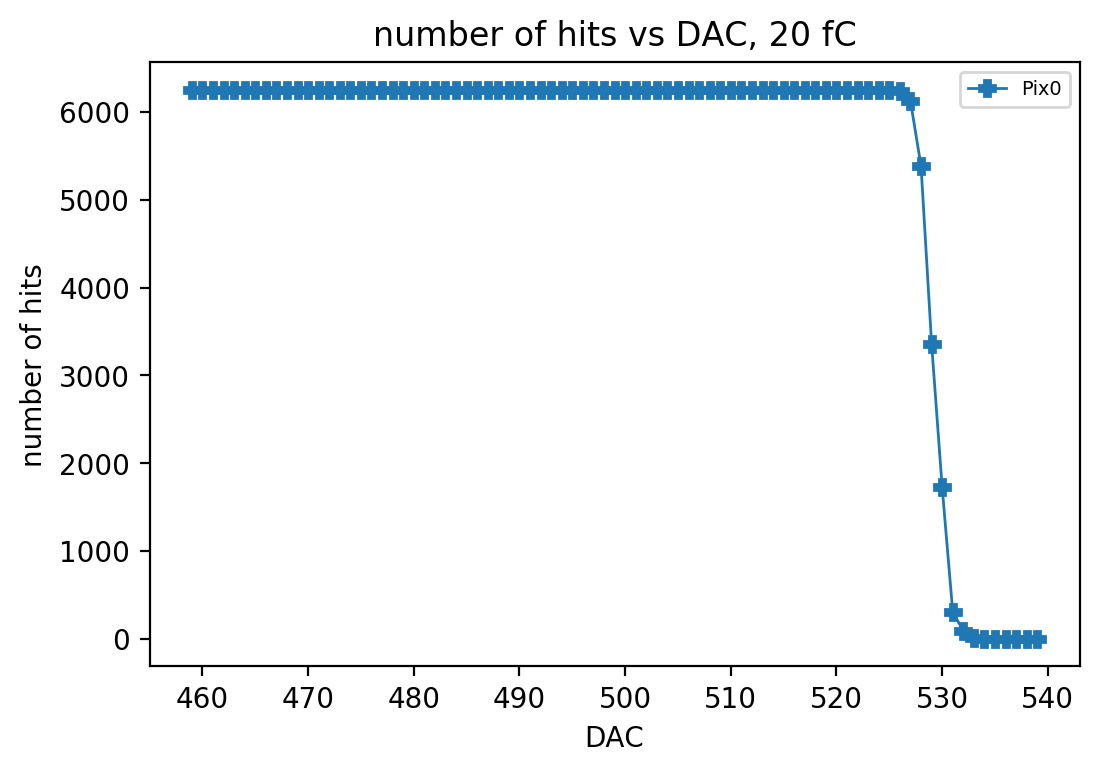

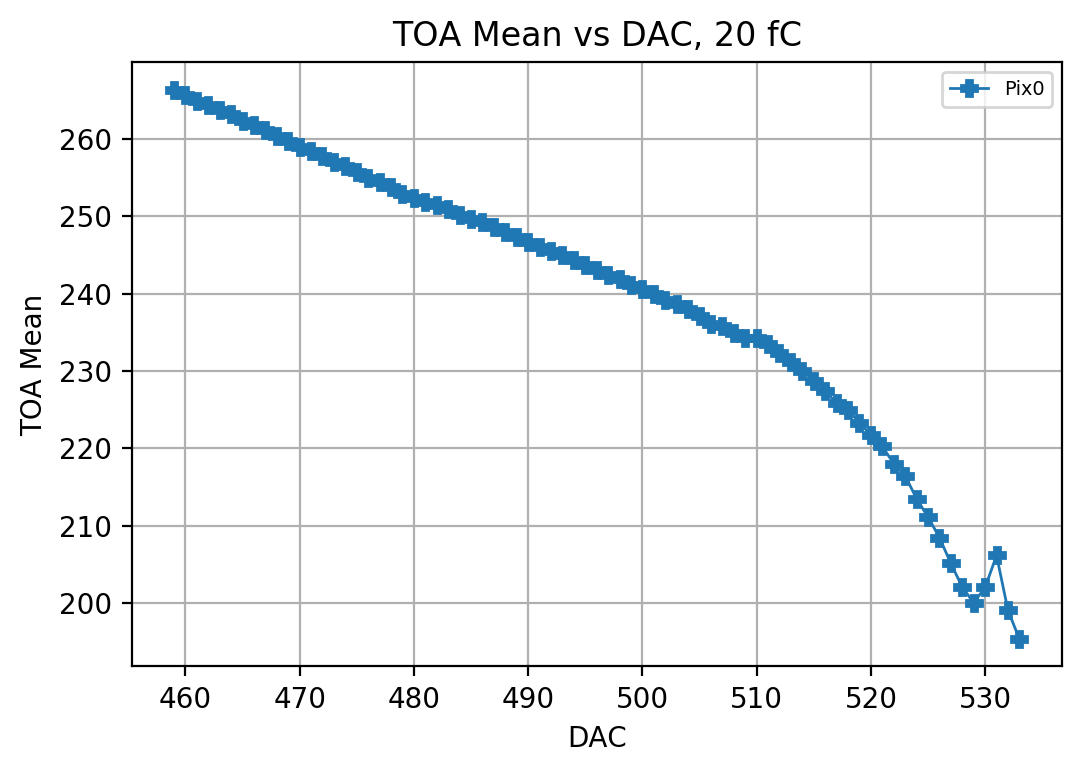

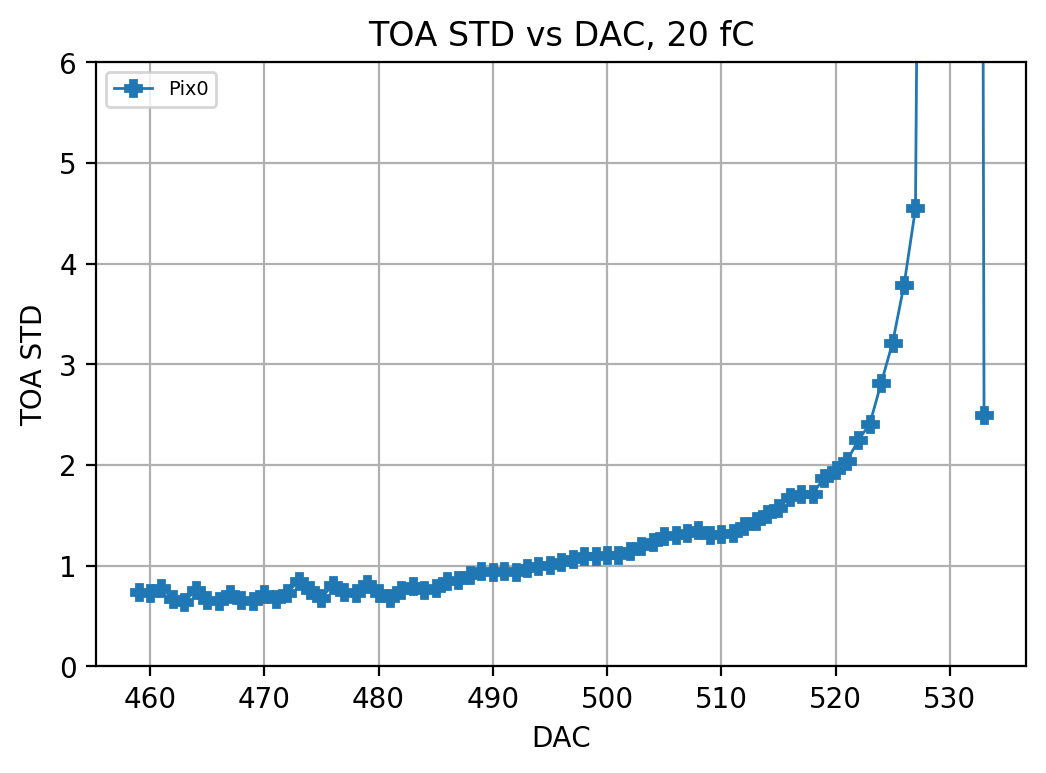

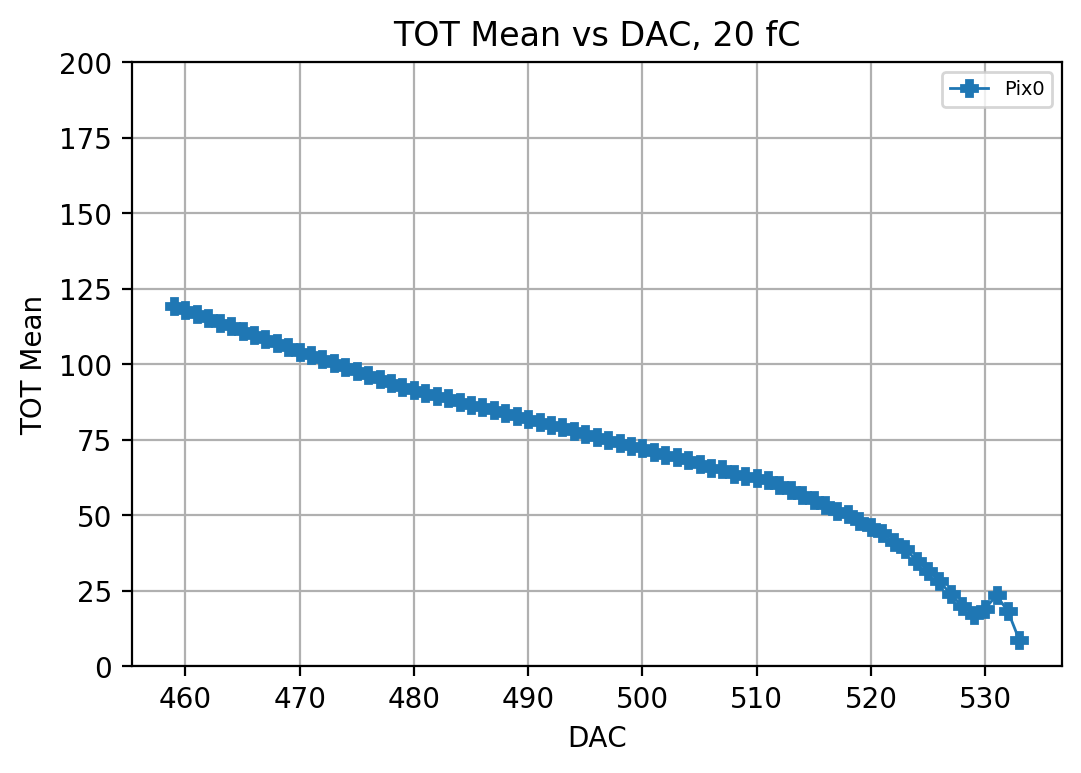

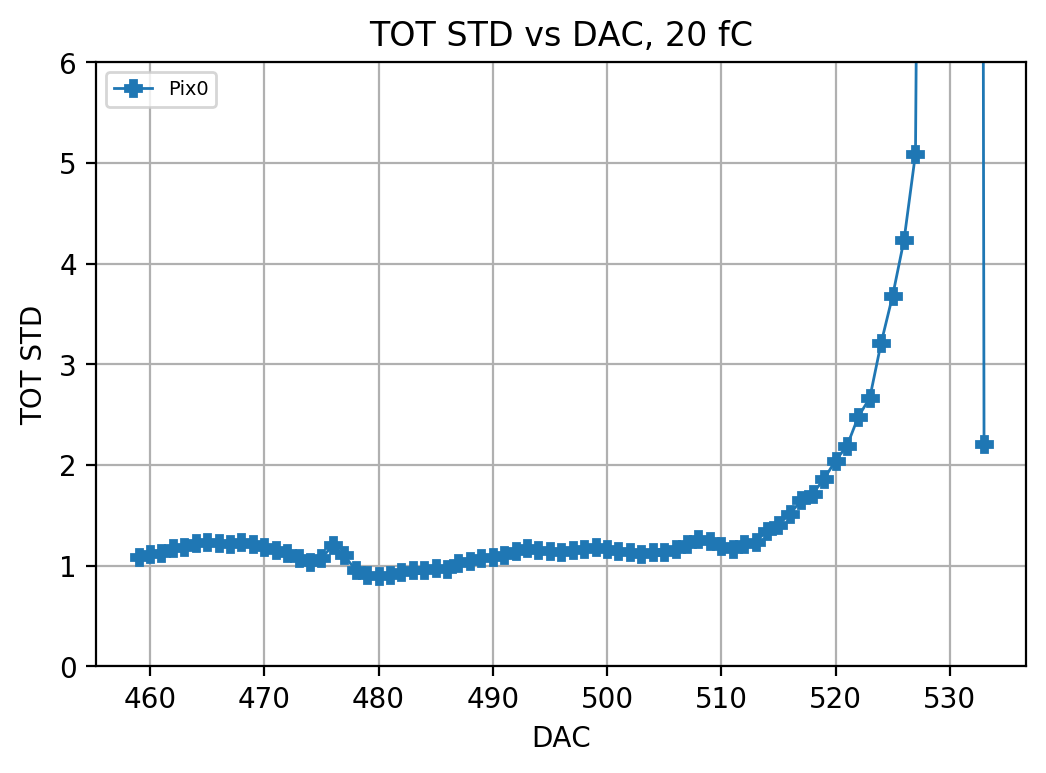

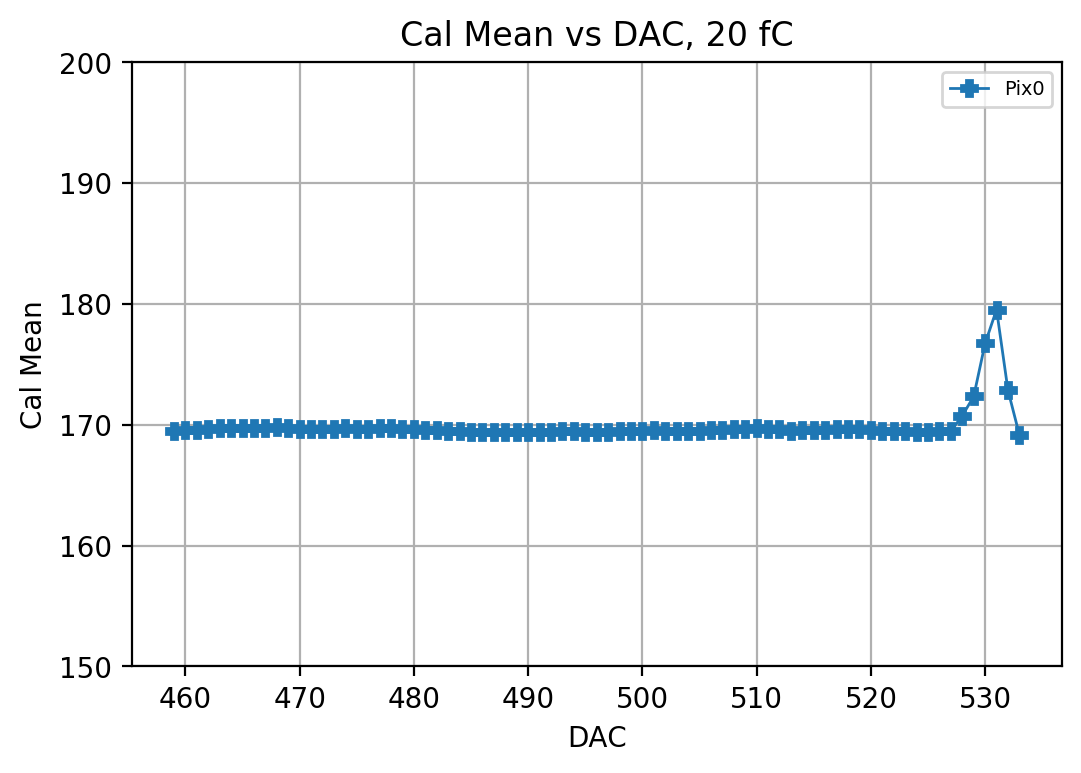

In [65]:
# plt.style.use('science')
import itertools
marker = itertools.cycle(('1', '2', '3', '4', 'd','^','v','*','x','s','p'))
pp = PdfPages(path+'/'+"plots_threshold_scan_20fC"+".pdf")

# marker=['.-','o-','x-','']

#######################  plot  ############################################
######### Plot hits vs DAC  ##############



left_limit = 440
right_limit = 520
bottom_limit = -100
top_limit = 7000
marker = itertools.cycle(('P', '2', '3', '4', 'd','^','v','*','x','s','p'))
fig, ax1 = plt.subplots(dpi=200)
for i in range(0,len(hits_20fC_scurve_list)):
    ax1.plot(DAC_20fC_list[i][DAC_20fC_start_list[i]:len_scan],hits_20fC_scurve_list[i][DAC_20fC_start_list[i]:len_scan],
             marker = next(marker), linestyle='-',linewidth=1, label=pixel_index_scurve_list[i] )
# i=15
# ax1.plot(DAC_20fC_list[i], hits_20fC_list[i], linewidth=1, label=pixel_index_list[i] )
# ax1.set_xlim(left=left_limit,right=right_limit)
# ax1.set_ylim(bottom=bottom_limit,top=top_limit)
# ax1.grid()
ax1.set(xlabel='DAC', ylabel='number of hits',
       title='number of hits vs DAC, 20 fC')
ax1.legend(loc='best', fontsize = 'x-small')
plt.show()
pp.savefig(fig)
plt.close(fig)




######### Plot toa vs DAC  ##############

# left_limit = 400
# right_limit = 520
# bottom_limit = -100
# top_limit = 7000
marker = itertools.cycle(('P', '2', '3', '4', 'd','^','v','*','x','s','p'))
fig, ax1 = plt.subplots(dpi=200)

for i in range(0,len(hits_20fC_scurve_list)):
    ax1.plot(DAC_20fC_list[i][DAC_20fC_start_list[i]:len_scan],toa_mu_20fC_scurve_list[i][DAC_20fC_start_list[i]:len_scan],
             marker = next(marker), linestyle='-', linewidth=1, label=pixel_index_scurve_list[i] )
# i=15
# ax1.plot(DAC_20fC_list[i], hits_20fC_list[i], linewidth=1, label=pixel_index_list[i] )
# ax1.set_xlim(left=left_limit,right=right_limit)
# ax1.set_ylim(bottom=bottom_limit,top=top_limit)
ax1.grid()
ax1.set(xlabel='DAC', ylabel='TOA Mean',
       title='TOA Mean vs DAC, 20 fC')
ax1.legend(loc='best', fontsize = 'x-small')
plt.show()
pp.savefig(fig)
plt.close(fig)

marker = itertools.cycle(('P', '2', '3', '4', 'd','^','v','*','x','s','p'))
fig, ax1 = plt.subplots(dpi=200)

for i in range(0,len(hits_20fC_scurve_list)):
    ax1.plot(DAC_20fC_list[i][DAC_20fC_start_list[i]:len_scan-1],toa_std_20fC_scurve_list[i][DAC_20fC_start_list[i]:len_scan-1],
             marker = next(marker), linestyle='-', linewidth=1, label=pixel_index_scurve_list[i] )
# i=15
# ax1.plot(DAC_20fC_list[i], hits_20fC_list[i], linewidth=1, label=pixel_index_list[i] )
# ax1.set_xlim(left=left_limit,right=right_limit)
ax1.set_ylim(bottom=0,top=6)
ax1.grid()
ax1.set(xlabel='DAC', ylabel='TOA STD',
       title='TOA STD vs DAC, 20 fC')
ax1.legend(loc='best', fontsize = 'x-small')
plt.show()
pp.savefig(fig)
plt.close(fig)


######### Plot tot vs DAC  ##############

# left_limit = 440
# right_limit = 520
# bottom_limit = -100
# top_limit = 7000
marker = itertools.cycle(('P', '2', '3', '4', 'd','^','v','*','x','s','p'))
fig, ax1 = plt.subplots(dpi=200)

for i in range(0,len(hits_20fC_scurve_list)):
    ax1.plot(DAC_20fC_list[i][DAC_20fC_start_list[i]:len_scan-1],tot_mu_20fC_scurve_list[i][DAC_20fC_start_list[i]:len_scan-1],
             marker = next(marker), linestyle='-',linewidth=1, label=pixel_index_scurve_list[i] )
# i=15
# ax1.plot(DAC_20fC_list[i], hits_20fC_list[i], linewidth=1, label=pixel_index_list[i] )
# ax1.set_xlim(left=left_limit,right=right_limit)
ax1.set_ylim(bottom=0,top=200)
ax1.grid()
ax1.set(xlabel='DAC', ylabel='TOT Mean',
       title='TOT Mean vs DAC, 20 fC')
ax1.legend(loc='best', fontsize = 'x-small')
plt.show()
pp.savefig(fig)
plt.close(fig)


fig, ax1 = plt.subplots(dpi=200)
marker = itertools.cycle(('P', '2', '3', '4', 'd','^','v','*','x','s','p'))
for i in range(0,len(hits_20fC_scurve_list)):
    ax1.plot(DAC_20fC_list[i][DAC_20fC_start_list[i]:len_scan-1],tot_std_20fC_scurve_list[i][DAC_20fC_start_list[i]:len_scan-1],
             marker = next(marker), linestyle='-',linewidth=1, label=pixel_index_scurve_list[i] )
# i=15
# ax1.plot(DAC_20fC_list[i], hits_20fC_list[i], linewidth=1, label=pixel_index_list[i] )
# ax1.set_xlim(left=left_limit,right=right_limit)
ax1.set_ylim(bottom=0,top=6)
ax1.grid()
ax1.set(xlabel='DAC', ylabel='TOT STD',
       title='TOT STD vs DAC, 20 fC')
ax1.legend(loc='best', fontsize = 'x-small')
plt.show()
pp.savefig(fig)
plt.close(fig)
marker = itertools.cycle(('P', '2', '3', '4', 'd','^','v','*','x','s','p'))
######### Plot cal vs DAC  ##############
fig, ax1 = plt.subplots(dpi=200)

for i in range(0,len(hits_20fC_scurve_list)):
    ax1.plot(DAC_20fC_list[i][DAC_20fC_start_list[i]:len_scan-1],cal_mu_20fC_scurve_list[i][DAC_20fC_start_list[i]:len_scan-1],
             marker = next(marker), linestyle='-',linewidth=1, label=pixel_index_scurve_list[i] )
# i=15
# ax1.plot(DAC_20fC_list[i], hits_20fC_list[i], linewidth=1, label=pixel_index_list[i] )
# ax1.set_xlim(left=left_limit,right=right_limit)
ax1.set_ylim(bottom=150,top=200)
ax1.grid()
ax1.set(xlabel='DAC', ylabel='Cal Mean',
       title='Cal Mean vs DAC, 20 fC')
ax1.legend(loc='best', fontsize = 'x-small')
plt.show()
pp.savefig(fig)
plt.close(fig)

pp.close()